<a href="https://colab.research.google.com/github/khushi-analytics/student-performance-classification/blob/main/student_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data handling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

In [4]:
#Load the Dataset from GitHub

url = 'https://raw.githubusercontent.com/khushi-analytics/student-performance-classification/main/StudentsPerformance.csv'
df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
df.describe()

Shape: (1000, 8)
Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


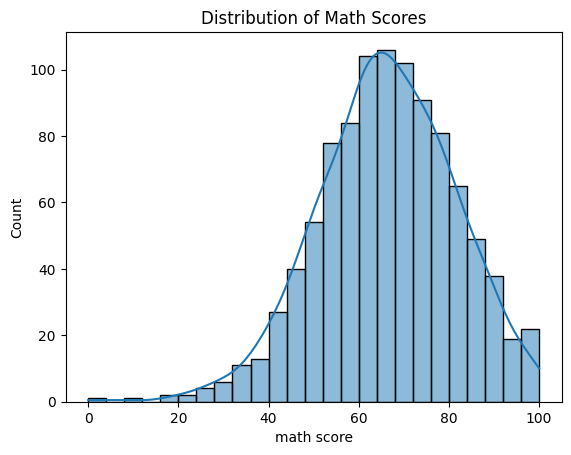

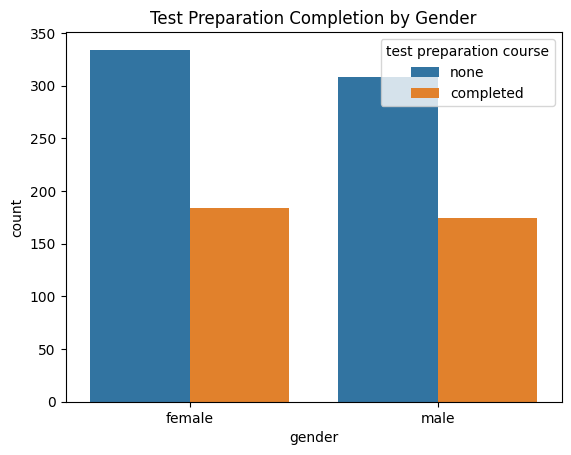

In [6]:
# Distribution of math scores
sns.histplot(df["math score"], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

# Count of students by gender and test preparation
sns.countplot(data=df, x="gender", hue="test preparation course")
plt.title("Test Preparation Completion by Gender")
plt.show()


In [7]:
# Create a binary target: Pass = 1 if score >= 50, else 0
df["pass_math"] = df["math score"].apply(lambda x: 1 if x >= 50 else 0)

# Check balance
df["pass_math"].value_counts(normalize=True)


,proportion
pass_math,
1,0.865
0,0.135


About 86.5% of students pass math. A balanced distribution helps build a fair model.

In [8]:
# Drop original target and unnecessary columns
X = df.drop(columns=["math score", "pass_math"])

# One-hot encode all categorical columns
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df["pass_math"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeff_df.head(10)


,Feature,Coefficient
2,gender_male,3.154751
12,lunch_standard,1.271351
13,test preparation course_none,0.859156
6,race/ethnicity_group E,0.755217
8,parental level of education_high school,0.349932
1,writing score,0.245167
10,parental level of education_some college,0.233624
11,parental level of education_some high school,0.107792
0,reading score,0.020576
4,race/ethnicity_group C,0.014213


Higher coefficients show features that strongly influence passing — e.g., "test preparation course_completed" has a large positive effect.

In [11]:
y_pred = model.predict(X_test)

# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.97      0.97      0.97       173

    accuracy                           0.94       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.94      0.94      0.94       200



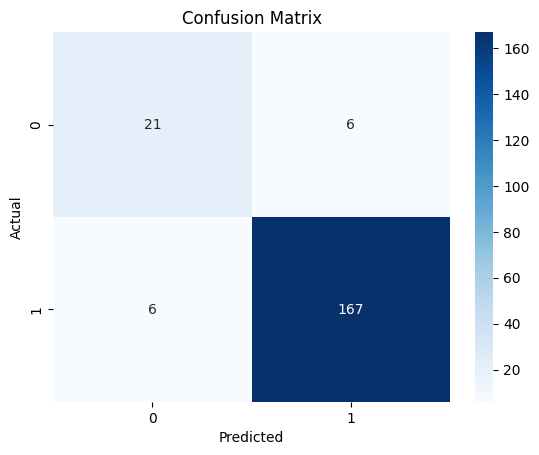

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


This shows how many pass/fail predictions were correct. The top-left and bottom-right are correct predictions.

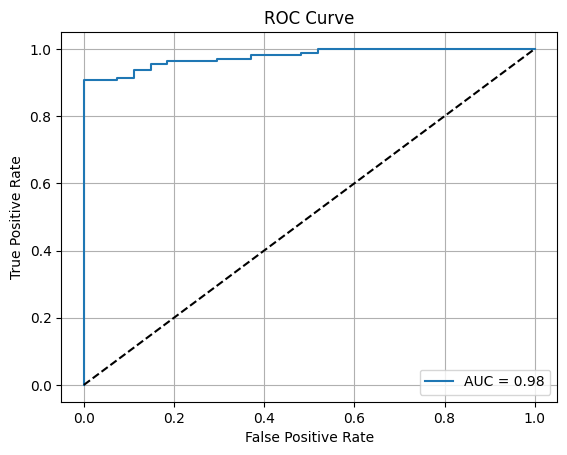

In [13]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Final Summary



*   Students who completed the test preparation course had a much higher probability of passing math.
*   Gender and parental education had moderate influence.
*   Model accuracy is high, and evaluation metrics suggest good generalization.


This logistic regression model can help schools identify students at risk of failing math,
based on early demographic and preparation data, and offer targeted support.
